In [1]:
import time
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import stats
from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector
from mmtwfs.telescope import MMT

In [2]:
from scipy import stats, ndimage, optimize
import photutils
from skimage import feature
from skimage.morphology import reconstruction
from skimage.transform import rotate as imrotate

import pathlib

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
bino = WFSFactory(wfs="binospec")
%cd /Users/tim/MMT/wfsdat/binospec/2017.1113

/Users/tim/MMT/wfsdat/binospec/2017.1113


In [5]:
def proc_file(wfs, mode, file, flipud=True):
    results = wfs.measure_slopes(file, mode=mode, plot=True, flipud=flipud)
    zresults = wfs.fit_wavefront(results, plot=True)
    results['figures']['slopes'].savefig(f"{file}.slopes.pdf")
    zresults['resid_plot'].savefig(f"{file}.residuals.pdf")
    zresults['zernike'].save(filename=f"{file}.sub.zernikes")
    zresults['rot_zernike'].save(filename=f"{file}.rot.zernikes")
    zresults['raw_zernike'].save(filename=f"{file}.raw.zernikes")
    zresults['ref_zernike'].save(filename=f"{file}.ref.zernikes")

In [15]:
bino_file = "/Users/tim/MMT/wfsdat/binospec/2017.1113/wfs_ff_cal_img_2017.1113.111448.fits"
bino_data = np.flipud(check_wfsdata(bino_file))

<IPython.core.display.Javascript object>


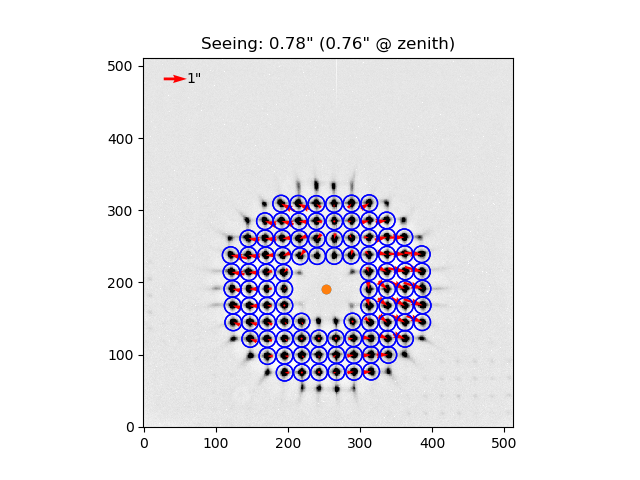

In [16]:
plt.close('all')
results = bino.measure_slopes(bino_file, mode="binospec", plot=True, flipud=True)
results['figures']['slopes'].show()
results['figures']['slopes'].savefig("blah.pdf")

197.2648198639563 nm
Fringe Coefficients
 Z02:       914 nm 	 X Tilt (1, 1)
 Z03:      -514 nm 	 Y Tilt (1, -1)
 Z04: -1.14e+03 nm 	 Defocus (2, 0)
 Z05: -2.24e+03 nm 	 Primary Astig at 45° (2, -2)
 Z06:  -1.1e+03 nm 	 Primary Astig at 0° (2, 2)
 Z07:       966 nm 	 Primary Y Coma (3, -1)
 Z08:      -230 nm 	 Primary X Coma (3, 1)
 Z09:       199 nm 	 Y Trefoil (3, -3)
 Z10:       135 nm 	 X Trefoil (3, 3)
 Z11:      -311 nm 	 Primary Spherical (4, 0)
 Z12:       261 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:        71 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:      -113 nm 	 X Tetrafoil (4, 4)
 Z15:      -231 nm 	 Y Tetrafoil (4, -4)
 Z16:     -21.3 nm 	 Secondary X Coma (5, 1)
 Z17:      -177 nm 	 Secondary Y Coma (5, -1)
 Z18:      -148 nm 	 Secondary X Trefoil (5, 3)
 Z19:       -17 nm 	 Secondary Y Trefoil (5, -3)
 Z20:     -66.2 nm 	 X Pentafoil (5, 5)
 Z21:       161 nm 	 Y Pentafoil (5, -5)
 Z22:       352 nm 	 Secondary Spherical (6, 0)
 Z23:      31.8 nm 	 Tertiary As

<IPython.core.display.Javascript object>


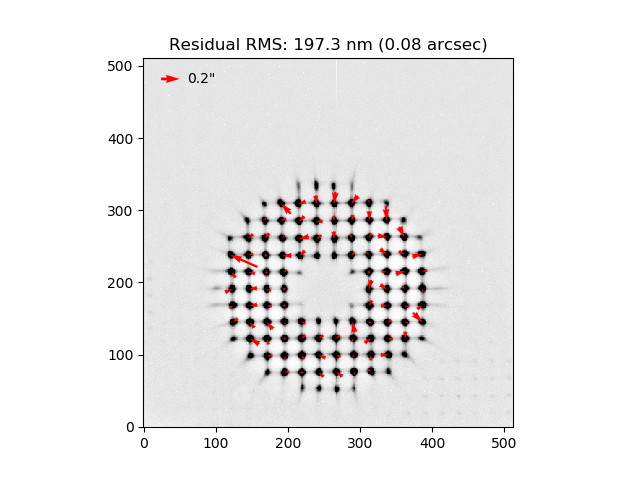

In [17]:
zresults = bino.fit_wavefront(results, plot=True)
zvec = zresults['zernike']
print(zresults['residual_rms'])
#zvec.normalize()
print(zvec)
zresults['resid_plot'].show()

<IPython.core.display.Javascript object>


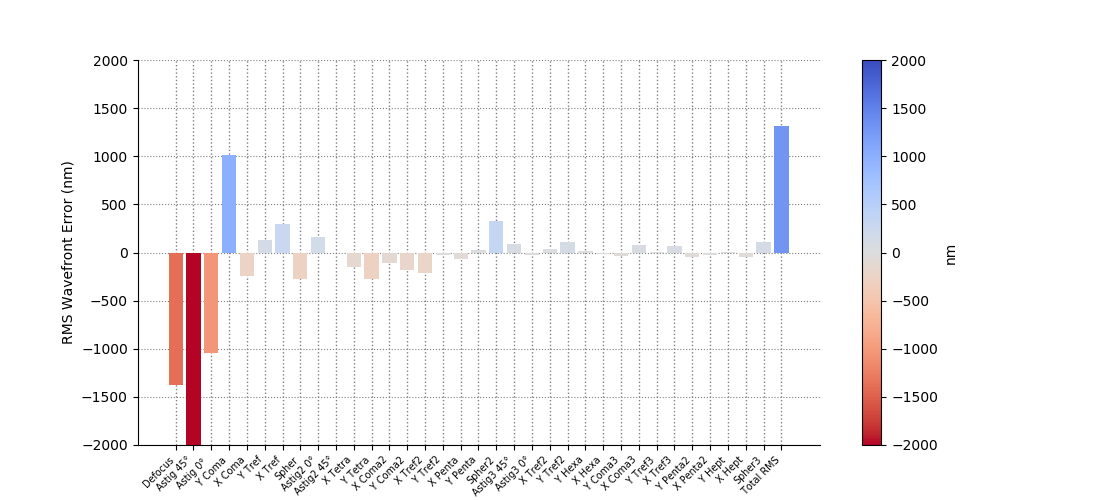

In [9]:
zresults['zernike'].fringe_bar_chart().show()

<IPython.core.display.Javascript object>


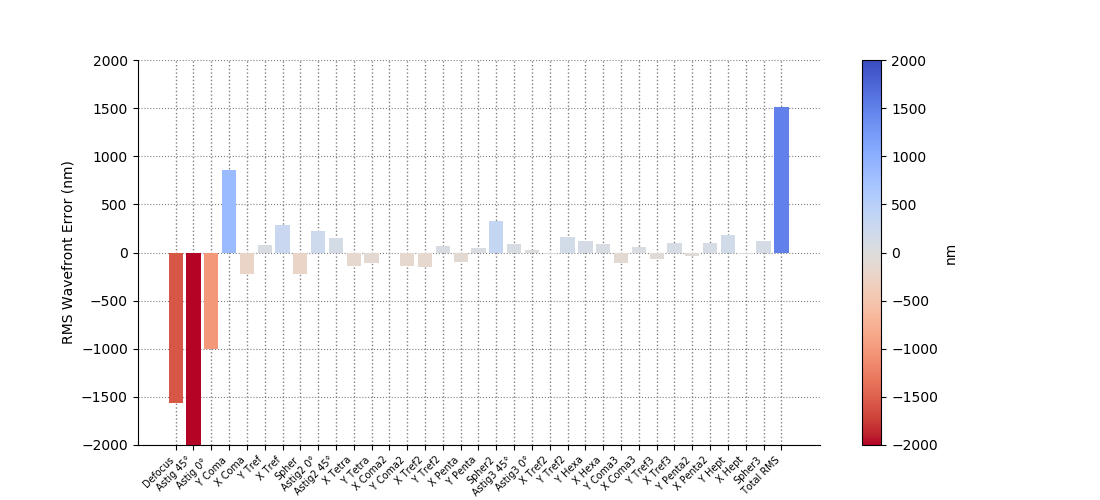

In [13]:
zresults['zernike'].fringe_bar_chart().show()

<IPython.core.display.Javascript object>


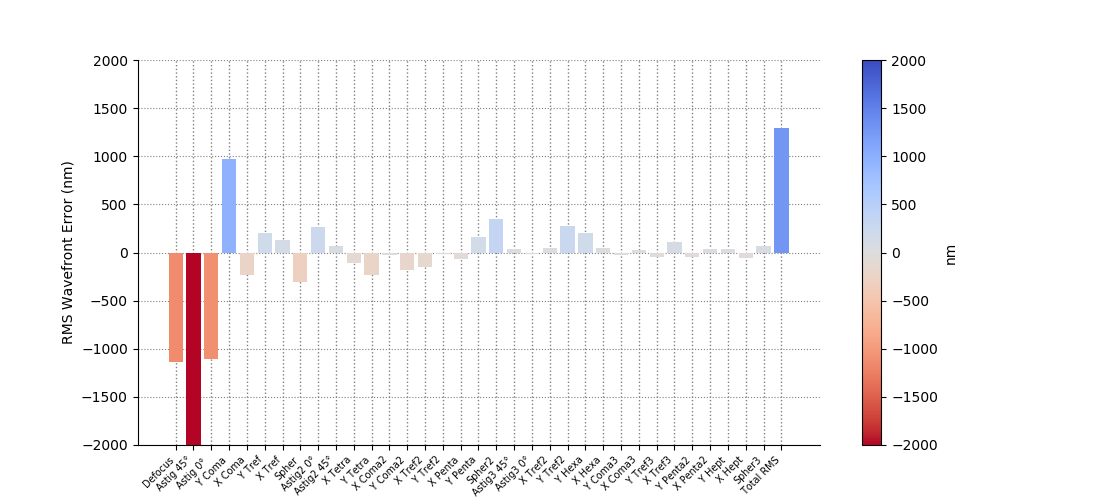

In [18]:
zresults['zernike'].fringe_bar_chart().show()

In [ ]:
x, y, fig = center_pupil(bino_data, bino.pupil_mask(), sigma=10)
plt.scatter(x, y)
fig.show()
x, y

In [ ]:
FS = np.fft.fftn(bino_data)
plt.imshow(np.log(np.abs(np.fft.fftshift(FS))**2))
#plt.imshow(np.log(np.abs(FS)**2))
plt.show()

In [ ]:
f = np.fft.fft(x)
n = x.size
freq = np.fft.fftfreq(n, d=2)
plt.plot(np.abs(1/freq), np.abs(f))
plt.show()

In [ ]:
plt.imshow(bino.pupil_mask())
plt.show()

In [ ]:
plt.close('all')

In [ ]:
results.keys()

In [ ]:
plt.imshow(bino_data, origin='lower')
plt.scatter(x, y)
plt.show()

In [ ]:
z = ZernikeVector(Z09=1000)
z

In [ ]:
z.rotate(-90 * u.deg)

z

In [ ]:
zz = ZernikeVector(Z10=1000)
zz

In [ ]:
zz.rotate(-90 * u.deg)

zz

In [ ]:
zzz = ZernikeVector(Z06=1000)
zzz.plot_map().show()

In [ ]:
zzz.rotate(45*u.deg)
zzz

In [ ]:
bc = zzz.fringe_bar_chart(title="foo")

In [ ]:
bc.show()

In [ ]:
bc.savefig("blah.pdf")

In [ ]:
p = pathlib.Path(".")

In [ ]:
for f in sorted(p.glob("*.fits")):
    print(f)
    plt.close('all')
    try:
        proc_file(bino, "binospec", str(f))
    except Exception as e:
        print(f"{f} failed: {e}")

In [19]:
plt.close('all')